**Secuencias de eventos tipo Bernoulli**
-
---

Son las posibilidades de obtener cierto suceso donde el espacio muestral es discreto.

Donde:

$k: \text{número de intentos}$

$n: \text{número de éxitos deseados}$

$p: \text{probabilidad del éxito en un suceso aislado}$

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [2]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

In [7]:
## Forma 1
# Definición de la distribución binomial 
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))

my binomial: 0.375



El método <kbd>.pmf</kbd> indica la posibilidad de que el suceso requerido suceda.

In [6]:
## Forma 2
dist = binom(3, 0.5)
dist.pmf(2)

0.3750000000000001

In [17]:
1 - dist.pmf(3)

0.875

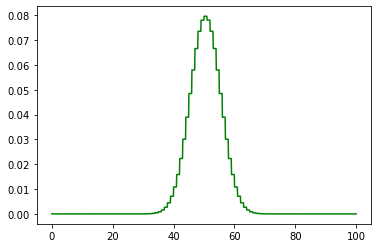

In [13]:
fig1, ax1 = plt.subplots()
x1 = np.linspace(0,100,num=1000)
y1 = np.array([my_binomial(int(i),100,0.5) for i in x1])
ax1.plot(x1, y1, color='g')
plt.show() 

#### **Simulaciones de secuencias con generadores aleatorios**

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [32]:
p=0.5
n=3
binomial(n, p)

1

In [33]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

In [185]:
binom(3,0.5).pmf(1)

0.3750000000000001

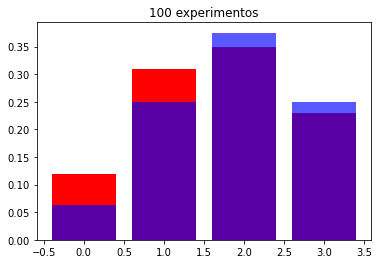

In [193]:
def plot_hist(num_trials):
    values = [0,1,2,3]
    arr = [binomial(len(values)-1, 0.5) for _ in range(num_trials+1)]
    sim = np.unique(arr, return_counts=True)[1]/num_trials
    teorica = [binom(len(values), 0.5).pmf(k) for k in values]
    plt.bar(values, sim, color = 'red')
    plt.bar(values, teorica, alpha = 0.65,color = 'blue')
    plt.title('{} experimentos'.format(num_trials))
plot_hist(100)
# h

#### **Distribución binomial acumulada**

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

El método <kbd>.cdf</kbd> indica la probabilidad acumulada de los sucesos desde $0$ hasta el solicitado.

In [14]:
dist.cdf(2)

0.875

En el siguiente gráfico se muestra las posibilidades de que se saquen hasta $23$ caras lanzando $1$ moneda $40$.
Para lo cual se necesita resolver:
$$ p\left(k\le{23}, n ;\frac{1}{2}\right)$$
$$ \sum_{i=0}^{23}\left(\begin{matrix}n\\i\end{matrix}\right)p^k(1-p)^{n-k} $$
Reemplazando:
$$ \sum_{i=0}^{23}\left(\begin{matrix}40\\i\end{matrix}\right)0.5^{i}(1-0.5)^{40-i} $$

In [117]:
dist1 = binom(40,0.5)
print('Respuesta: {}'.format(dist1.cdf(23)))

Respuesta: 0.8659063744726154


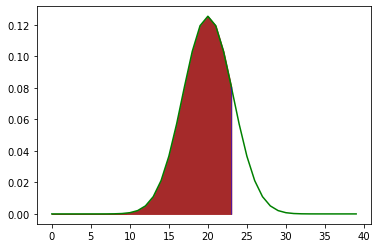

In [111]:
fig2, ax2 = plt.subplots()
x2 = [i for i in range(40)]
y2 = dist1.pmf(x2)
ax2.plot(x2, y2, color='g')
pp1=23
linea1 = np.array([[pp1,pp1],[0,dist1.pmf(pp1)]])
ax2.plot(linea1[0], linea1[1], color='blue', linewidth=0.5)
ax2.fill_between(x2, y2,0, where=[i<=pp1 for i in x2],color='brown')
plt.show() 